<font color="green">Miguel Moretón Martín

Santiago Norzagaray Aguilar

Pablo Gutiérrez Palomares

24-11-2025</font>

### **KNN FUNDAMENTALS**

**KNN ALGORITHM**
KNN is one of the simplest machine learning algorithms. One of its advantages is that it is a non-parametric algorithm, which means that there is no assumption about the data distribution. It requires a dataset with training examples as input, and the output can be either a classification or used for regression purposes.

- In **KNN classification**, the output is a class membership. The given data point is classified based on the majority of type of its neighbours. The data point is assigned to the most frequent class among its k nearest neighbours. Meaning for example that if K=1, then its class will be the same as it closest neighbour.

**KNN INTUITION**
The algorithm is very simple, it just calculates the distance between the k number of points from the training dataset and the point we want to analyze and assiging the class type of the closest ones.

Example.
- Suppose, we have a dataset with two variables which are classified as Red and Blue.

- In kNN algorithm, k is the number of nearest neighbours. Generally, k is an odd number because it helps to decide the majority of the class. When k=1, then the algorithm is known as the nearest neighbour algorithm.

- Now, we want to classify a new data point X into Blue class or Red class. Suppose the value of k is 3. The KNN algorithm starts by calculating the distance between X and all the other data points. It then finds the 3 nearest points with least distance to point X.

- In the final step of the kNN algorithm, we assign the new data point X to the majority of the class of the 3 nearest points. If 2 of the 3 nearest points belong to the class Red while 1 belong to the class Blue, then we classify the new data point as Red.

### **KNN PRESENTATION**

- Library declaration
-First, we will create a class to declare the KNN algorithm
-Then we will load a data model
-Our model consists of different variables to predict whether a patient has or does not have diabetes
-We will choose 3 combinations of variables to which we will apply KNN
-We will load the test data model and analyze the performance for each combination


**OBJECTIVE:** find the combination of variables that best predicts whether a patient does or does not have diabetes


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### **DEFINITION OF KNN**

In [2]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Calculate the Euclidean distance to the xi in the training set
        distances = np.linalg.norm(self.X_train - x, axis=1)
        # Obtains the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        # k determine the labels of the k nearest neighbors 
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

### **CHOOSING VARIABLES AND LOADING THE TRAINING DATASET**

- Loads the model test
- In this case the following combinations of variables will be choosen to apply KNN algorithm:
    1. Glucose y BloodPressure
    2. SkinThickness y BMI
    3. Glucose y BMI
- Plots graphics of the training datasets

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


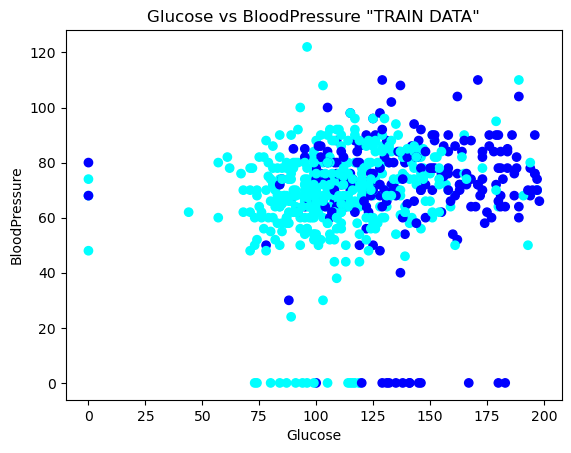

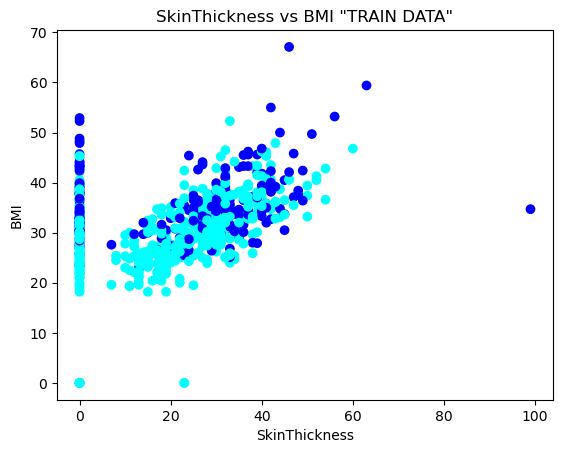

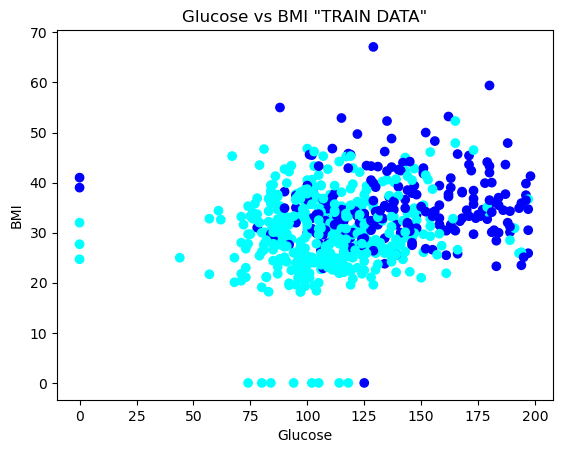

In [3]:
train = pd.read_csv("train.csv")
print(train.head(5))

# First combination of variables (Glucose and BloodPressure)
x1 = train[['Glucose', 'BloodPressure']].values
y1 = train['Outcome'].values
# Visualizes the distribution of the data in the training set
colors = {0: 'cyan', 1: 'blue'}

point_colors = [colors[cls] for cls in y1]
plt.scatter(x1[:, 0], x1[:, 1], c=point_colors)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Glucose vs BloodPressure "TRAIN DATA"')
plt.show()

# Second combination of variables (SkinThickness and BMI)
x2 = train[['SkinThickness', 'BMI']].values
y2 = train['Outcome'].values
# Visualizes the distribution of the data in the training set
point_colors = [colors[cls] for cls in y2]
plt.scatter(x2[:, 0], x2[:, 1], c=point_colors)
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.title('SkinThickness vs BMI "TRAIN DATA"')
plt.show()


# Third combination of variables (Glucose and BMI)
x3 = train[['Glucose', 'BMI']].values
y3 = train['Outcome'].values

# Visualizes the distribution of the data in the training set
point_colors = [colors[cls] for cls in y3]
plt.scatter(x3[:, 0], x3[:, 1], c=point_colors)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Glucose vs BMI "TRAIN DATA"')
plt.show()




### **DATA TRAINING AND PREDICTION**

- Train the model using the KNN fit function and selects the value of K (the number of neighbors) that we will consider.
- Load the data from test.
- Make predictions  using the test data variables.
- Determines how accurate is our KNN for the selected number of K neighbours.

Evaluation of changes in K
To evaluate diferent changes on the K value we are going to use the combitation between Glucose and BMI and we are going to see how the efficiency changes and the data plotted.

#### **LOW K VALUE**

A low K value can mean that the predicttion made isn't accuarate, for example taking  noisy data wich could lead to overfitting, also a low K means that the algorithm tries to memorize the data from the training dataset, another problem could be that the nearest neighbor belongs to the wrong class do to many causes such as randomness, noise or measurement errors.

Performance for Glucose y BloodPressure: 0.65
Performance for SkinThickness y BMI: 0.53
Performance for Glucose y BMI: 0.63


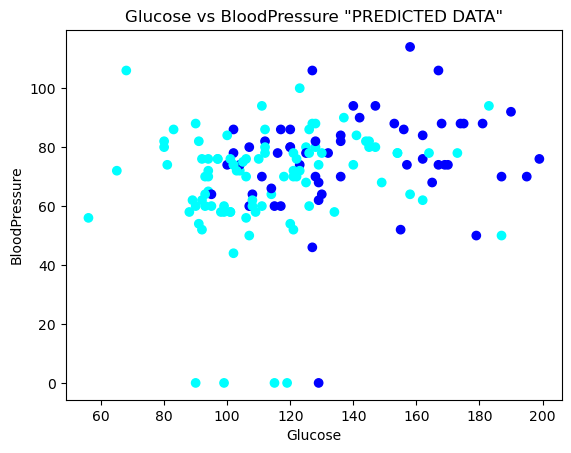

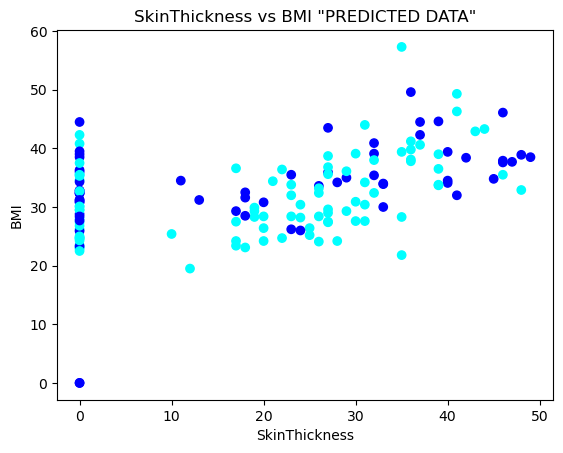

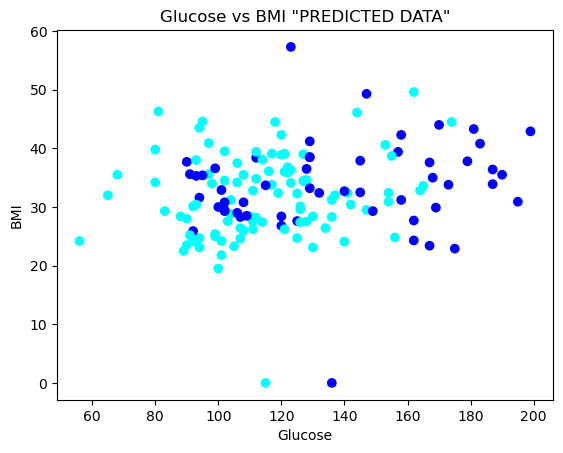

In [4]:
# Train KNN for the first combination of variables
knn1 = KNN(k=1)
knn1.fit(x1, y1)
test = pd.read_csv("test.csv")
x1_test = test[['Glucose', 'BloodPressure']].values
y1_test = test['Outcome'].values
predictions1 = knn1.predict(x1_test)
rendiemiento1 = np.sum(predictions1 == y1_test) / len(y1_test)
print(f'Performance for Glucose y BloodPressure: {rendiemiento1:.2f}')

# Train KNN for the second combination of variables
knn2 = KNN(k=1)
knn2.fit(x2, y2)
x2_test = test[['SkinThickness', 'BMI']].values
y2_test = test['Outcome'].values
predictions2 = knn2.predict(x2_test)
rendiemiento2 = np.sum(predictions2 == y2_test) / len(y2_test)
print(f'Performance for SkinThickness y BMI: {rendiemiento2:.2f}')

# Train KNN for the third combination of variables
knn3 = KNN(k=1)
knn3.fit(x3, y3)
x3_test = test[['Glucose', 'BMI']].values
y3_test = test['Outcome'].values
predictions3 = knn3.predict(x3_test)
rendiemiento3 = np.sum(predictions3 == y3_test) / len(y3_test)
print(f'Performance for Glucose y BMI: {rendiemiento3:.2f}')

# Visualizes the predictions for the test set
plt.scatter(
    x1_test[:, 0],
    x1_test[:, 1],
    c=[colors[p] for p in predictions1]
)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Glucose vs BloodPressure "PREDICTED DATA"')
plt.show()

plt.scatter(
    x2_test[:, 0],
    x2_test[:, 1],
    c=[colors[p] for p in predictions2]
)
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.title('SkinThickness vs BMI "PREDICTED DATA"')
plt.show()

plt.scatter(
    x3_test[:, 0],
    x3_test[:, 1],
    c=[colors[p] for p in predictions3]
)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Glucose vs BMI "PREDICTED DATA"')
plt.show()

#### **HIGH K EXAMPLE**

A too big K means that we use a lot of the data from our training dataset, that makes the model too simple because it makes the average of the distance of all, meaning that you can be missing local structures leading to underfitting making the model unnable to capture complex class shapes.
Also one of the most important problems of a high K is the dominnance of a class, because it will usually benefict the most common one.no

Performance for Glucose y BloodPressure: 0.64
Performance for SkinThickness y BMI: 0.64
Performance for Glucose y BMI: 0.64


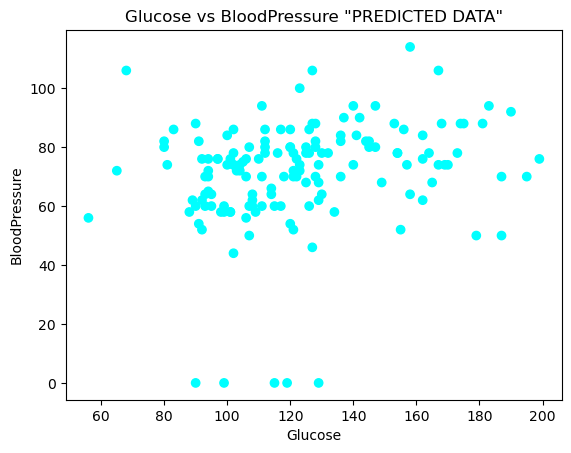

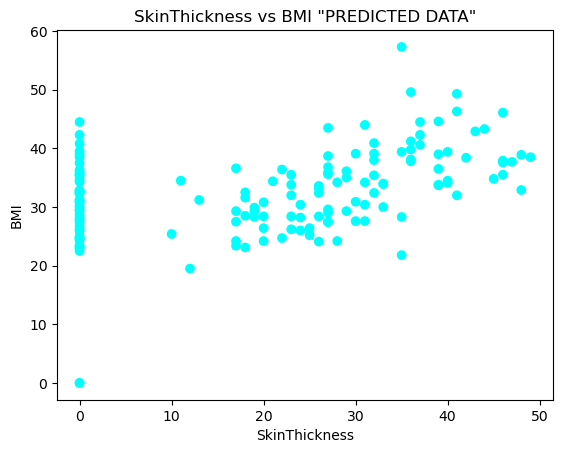

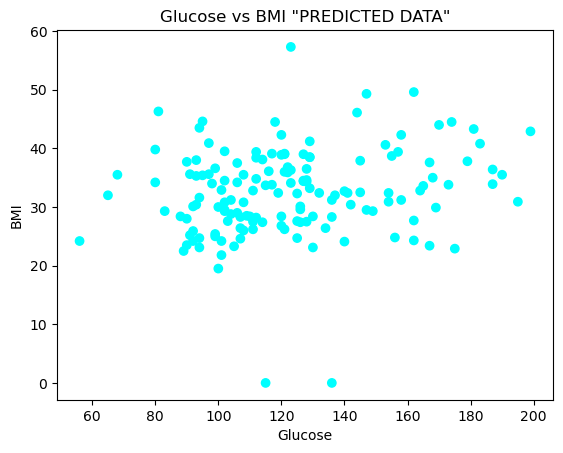

In [5]:
# Train KNN for the first combination of variables
knn1 = KNN(k=500)
knn1.fit(x1, y1)
test = pd.read_csv("test.csv")
x1_test = test[['Glucose', 'BloodPressure']].values
y1_test = test['Outcome'].values
predictions1 = knn1.predict(x1_test)
rendiemiento1 = np.sum(predictions1 == y1_test) / len(y1_test)
print(f'Performance for Glucose y BloodPressure: {rendiemiento1:.2f}')

# Train KNN for the second combination of variables
knn2 = KNN(k=500)
knn2.fit(x2, y2)
x2_test = test[['SkinThickness', 'BMI']].values
y2_test = test['Outcome'].values
predictions2 = knn2.predict(x2_test)
rendiemiento2 = np.sum(predictions2 == y2_test) / len(y2_test)
print(f'Performance for SkinThickness y BMI: {rendiemiento2:.2f}')

# Train KNN for the third combination of variables
knn3 = KNN(k=500)
knn3.fit(x3, y3)
x3_test = test[['Glucose', 'BMI']].values
y3_test = test['Outcome'].values
predictions3 = knn3.predict(x3_test)
rendiemiento3 = np.sum(predictions3 == y3_test) / len(y3_test)
print(f'Performance for Glucose y BMI: {rendiemiento3:.2f}')

# Visualizes the predictions for the test set
plt.scatter(
    x1_test[:, 0],
    x1_test[:, 1],
    c=[colors[p] for p in predictions1]
)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Glucose vs BloodPressure "PREDICTED DATA"')
plt.show()

plt.scatter(
    x2_test[:, 0],
    x2_test[:, 1],
    c=[colors[p] for p in predictions2]
)
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.title('SkinThickness vs BMI "PREDICTED DATA"')
plt.show()

plt.scatter(
    x3_test[:, 0],
    x3_test[:, 1],
    c=[colors[p] for p in predictions3]
)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Glucose vs BMI "PREDICTED DATA"')
plt.show()


#### **OPTIMAL K VALUE**

So whats the optimun number of K?
A common rule is to make K the squared root of the number of samples:
    K=√N
Another important thing is to use odd numbers so you can avoid ties.
And the best way to choose is by trying and measuring the performance.

Performance for Glucose y BloodPressure: 0.71
Performance for SkinThickness y BMI: 0.62
Performance for Glucose y BMI: 0.70


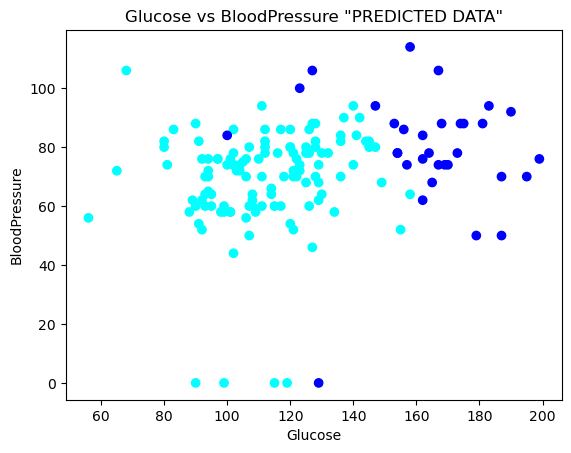

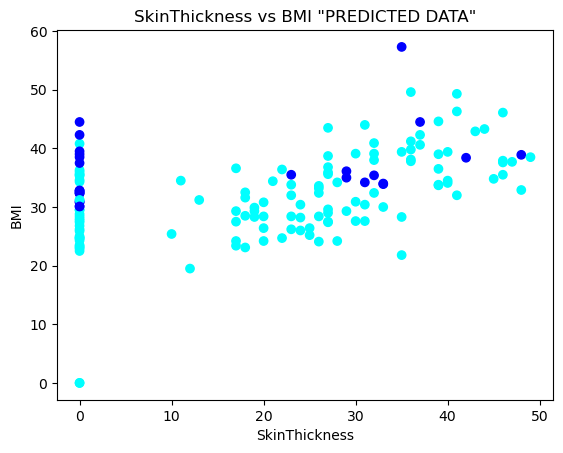

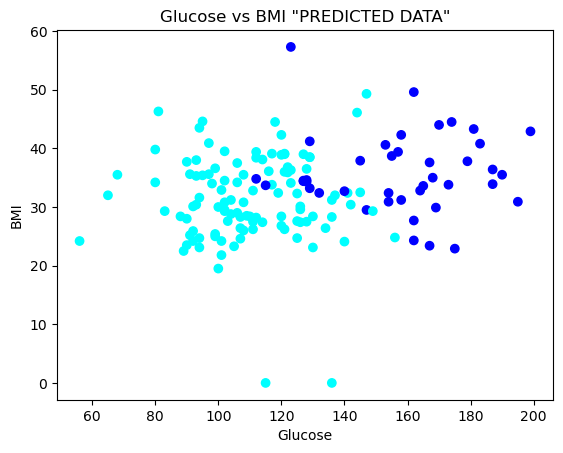

In [6]:
# Train KNN for the first combination of variables
knn1 = KNN(k=12)
knn1.fit(x1, y1)
test = pd.read_csv("test.csv")
x1_test = test[['Glucose', 'BloodPressure']].values
y1_test = test['Outcome'].values
predictions1 = knn1.predict(x1_test)
rendiemiento1 = np.sum(predictions1 == y1_test) / len(y1_test)
print(f'Performance for Glucose y BloodPressure: {rendiemiento1:.2f}')

# Train KNN for the second combination of variables
knn2 = KNN(k=12)
knn2.fit(x2, y2)
x2_test = test[['SkinThickness', 'BMI']].values
y2_test = test['Outcome'].values
predictions2 = knn2.predict(x2_test)
rendiemiento2 = np.sum(predictions2 == y2_test) / len(y2_test)
print(f'Performance for SkinThickness y BMI: {rendiemiento2:.2f}')

# Train KNN for the third combination of variables
knn3 = KNN(k=12)
knn3.fit(x3, y3)
x3_test = test[['Glucose', 'BMI']].values
y3_test = test['Outcome'].values
predictions3 = knn3.predict(x3_test)
rendiemiento3 = np.sum(predictions3 == y3_test) / len(y3_test)
print(f'Performance for Glucose y BMI: {rendiemiento3:.2f}')

# Visualizes the predictions for the test set
plt.scatter(
    x1_test[:, 0],
    x1_test[:, 1],
    c=[colors[p] for p in predictions1]
)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Glucose vs BloodPressure "PREDICTED DATA"')
plt.show()

plt.scatter(
    x2_test[:, 0],
    x2_test[:, 1],
    c=[colors[p] for p in predictions2]
)
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.title('SkinThickness vs BMI "PREDICTED DATA"')
plt.show()

plt.scatter(
    x3_test[:, 0],
    x3_test[:, 1],
    c=[colors[p] for p in predictions3]
)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Glucose vs BMI "PREDICTED DATA"')
plt.show()


### **CONCLUSION**
After comparing different examples of K values we can clearly conclude that there is a significant difference on the accurancy between the values of K neighbours showing that the K=√N is the best solution for our problem.
Based on the variables compared the combination that best predicts diabetes on this dataset is Glucose vs BMI.
